# Разведочный анализ данных, реализация скриптов для подготовки выборок

Проведение разведочного анализа включает в себя такие подзадачи как:
- частотный анализ коллекции(например распределение количества слов в документах)
- выбор пространства признаков с обоснование данных признаков
- визуализация данных
- подсчет статистических параметров для коллекции с использованием выбранных признаков(например среднее, стандартное отклонение, квартили и тд)
- поиск выбросов и аномалий, их анализ, выбор методов детектирования аномалий и их обработки.
- корреляционный анализ(например, построенные парные диаграммы рассеяния различных признаков, их гистограммы распределения, корреляционные матрицы, проверка гипотезы о гомоскедастичности данных и подобных ей)
- выбор целевых переменных для задач классификации документов по темам на основе тегов и предсказания рейтинга документа.
- построение распределения и анализ целевых переменных

Для полноты анализа могут быть описаны различные преобразования данных и их анализ, применение PCA, анализ feature importance, поиск ложных корреляций.
После проведения каждого анализа следует фиксировать выводы о полученных результатах. 

Для сдачи необходимо представить ноутбуки в которых проведен соответствующий анализ и описаны выводы и рекомендации по работе с данной коллекцией.


## Разведочный анализ данных текстовых параметров малой коллекции 

- Содержимое публикации
- Заголовок
- Теги
- Автор

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import collections

import warnings
warnings.filterwarnings('ignore')

In [3]:
filename = r'C:\Users\Public\Projects\python\Pikabu\InformationRetrieval\data\processed\dataset_hot.csv'
df = pd.read_csv(filename)

In [4]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'FileName', 'Title', 'Link', 'ArticleId',
       'Date', 'Views', 'Author', 'Tags', 'AmountComments', 'Rating', 'Text'],
      dtype='object')

### Предобработка

In [5]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)
df_text = df[['Title','Tags','Text','Author']]
df_text.head()

,Title,Tags,Text,Author
0,соседка,мой сосед электричество текст воровство,делать брат капитальный ремонт квартира матерь...,EdwardSeed
1,карантинный будни екатеринбург,стишкипирожка свердловск екатеринбург текст,пустой екатеринбургасползать радужность лоск п...,ghazan
2,роль изоляция учебный процесс,мой дифтерия учёба текст видео,школа хорошист трояк бывать отличник вообще кр...,YuraOsinin
3,адаптироваться преодолевать,собака лестница ветеринарный воротник видео,пикаба,asdfg1975
4,хороший идея,противогаз коронавирус скриншот,NaN,poznikidze


In [6]:
df_text['Title'] = df_text['Title'].apply(lambda x: str(x).split(" "))
df_text['Tags'] = df_text['Tags'].apply(lambda x: str(x).split(" "))
df_text['Text'] = df_text['Text'].apply(lambda x: str(x).split(" "))

### Статистические параметры коллекции

In [25]:
df_text.describe()

,Title,Tags,Text,Author
count,1472,1490,1085,1492
unique,1260,1305,860,944
top,карантин,халява бесплатно игра раздача промокод длиннопост,пикаба,Deathman
freq,6,4,81,29


## Частотный анализ коллекции

<BarContainer object of 40 artists>

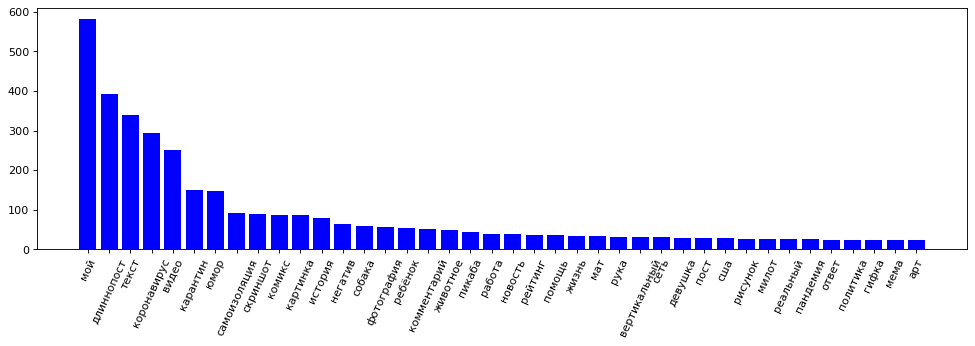

In [28]:
# Самые популярные слова в тегах

freq_tags = pd.Series([y for x in df_text['Tags'].values.flatten() for y in x]).value_counts()
plt.figure(num=None, figsize=(15, 4), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=65)
plt.bar(freq_tags.index[:40], freq_tags[:40], color='b')

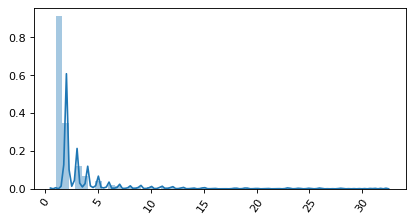

In [29]:
# Распределение частых слов в тегах после 25 самых популярных

plt.figure(num=None, figsize=(6, 3), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=55)
sns.distplot(freq_tags[25:])

<BarContainer object of 40 artists>

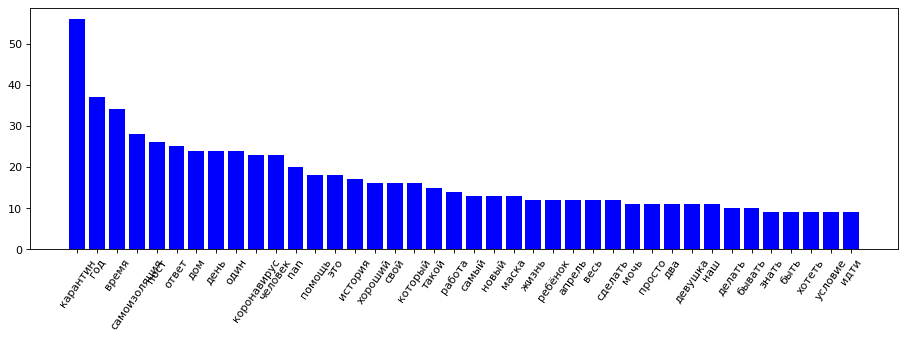

In [15]:
# Самые популярные слова в заголовках

freq_title = pd.Series([y for x in df_text['Title'].values.flatten() for y in x]).value_counts()
plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=55)
plt.bar(freq_title.index[:40], freq_title[:40], color='b')

<BarContainer object of 50 artists>

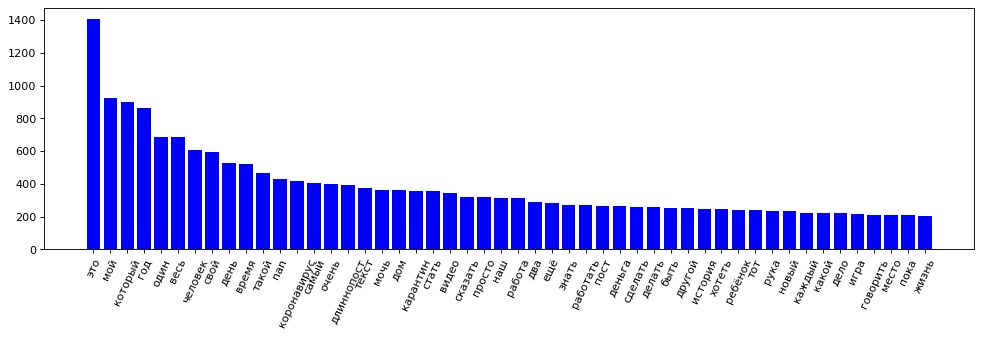

In [17]:
# самые популярные слова в общем

freq_all = pd.Series([y for x in df_text[['Title','Text','Tags']].values.flatten() for y in x]).value_counts()
plt.figure(num=None, figsize=(15, 4), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=65)
plt.bar(freq_all.index[:50], freq_all[:50], color='b')

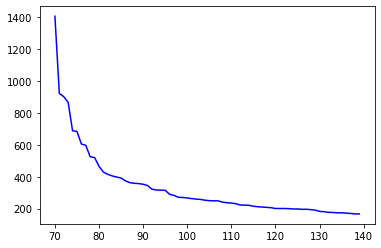

In [18]:
# Распределение всех слов после 70 самых популярных

plt.plot(range(70, 70 + len(freq_all[:70])), freq_all[:70], c='b')

In [26]:
# Половина слов встречаются 1 или 2 раза

print("Количество всех слов: \t\t\t\t\t" + str(len(freq_all)))
print("Количество всех слов, встречающихся 1 или 2 раза:\t" + str(len(freq_all[freq_all < 3])))

Количество всех слов: 					21304
Количество всех слов, встречающихся 1 или 2 раза:	13133


<BarContainer object of 30 artists>

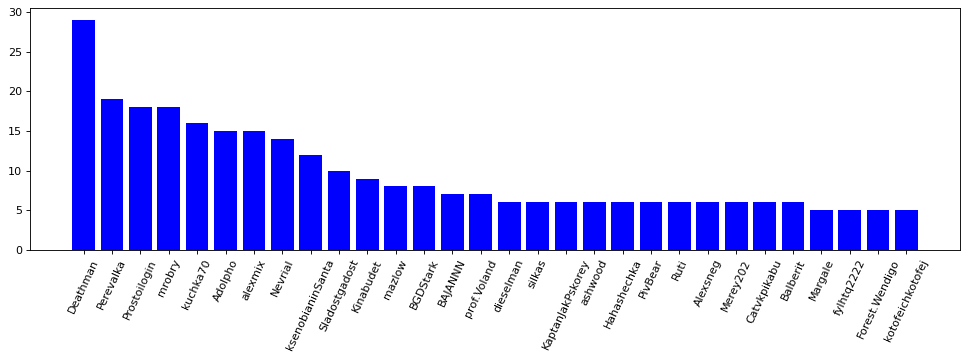

In [37]:
# самые популярные авторы

freq_author = pd.Series([x for x in df_text[['Author']].values.flatten()]).value_counts()
plt.figure(num=None, figsize=(15, 4), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(rotation=65)
plt.bar(freq_author.index[:30], freq_author[:30], color='b')

### Корреляции

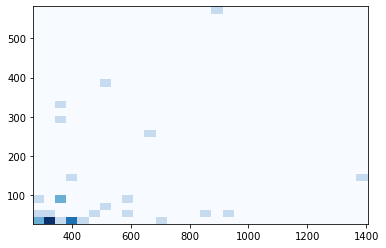

In [31]:
# гистограмма взаимной корреляции самых популярных слов в тегах и самых популярных слов в тексте публикаций

plt.hist2d(freq_all[:30].sort_index(), freq_tags[:30].sort_index(), bins=30, cmap='Blues')
plt.show()

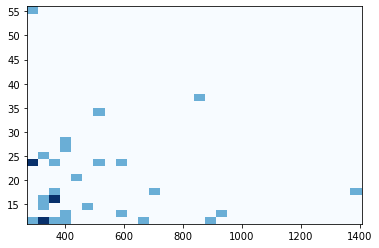

In [32]:
# гистограмма взаимной корреляции самых популярных слов в текстах публикаций и самых популярных слов в заголовках публикаций

plt.hist2d(freq_all[:30].sort_index(), freq_title[:30].sort_index(), bins=30, cmap='Blues')
plt.show()

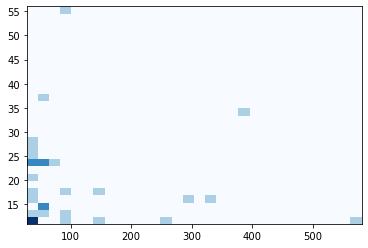

In [33]:
# гистограмма взаимной корреляции самых популярных слов в тегах и самых популярных слов в заголовках публицакий

plt.hist2d(freq_tags[:30].sort_index(), freq_title[:30].sort_index(), bins=30, cmap='Blues')
plt.show()

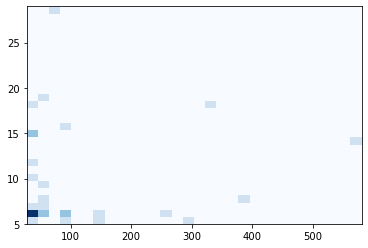

In [38]:
plt.hist2d(freq_tags[:30].sort_index(), freq_author[:30].sort_index(), bins=30, cmap='Blues')
plt.show()